In [ ]:
!pip install ultralytics #Instalando a lib do ultralytics ou Yolo
!pip install roboflow --quiet #Instalando a requisição do roboflow para chamar o database

In [2]:
#Importação das libs necessarias
from roboflow import Roboflow
from ultralytics import YOLO
import os

In [ ]:
!nvidia-smi #Verificando o uso da GPU

In [8]:
rf = Roboflow(api_key="g0KoEAgvz4PWbZxIwYvF") #Passando a cheve
project = rf.workspace('marino-gasparetti').project("facedetector-yj50a") #Passando o endereço do workspace e
#do porjeto localizado na barra de pesquisa do dataset
dataset = project.version(2).download("yolov8") #Trazendo o database com as dependencias do yolov8



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.118, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to FaceDetector-2 in yolov8:: 100%|██████████| 470/470 [00:00<00:00, 3205.31it/s]


In [ ]:
model = YOLO('yolov8n.pt') #Carregando o modelo do yolo em uma varialvel
#para passar como parametro

#Carregando o modelo e treinando
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolov8n.pt epochs=5 plots=True name=yolov8n_custom


/content


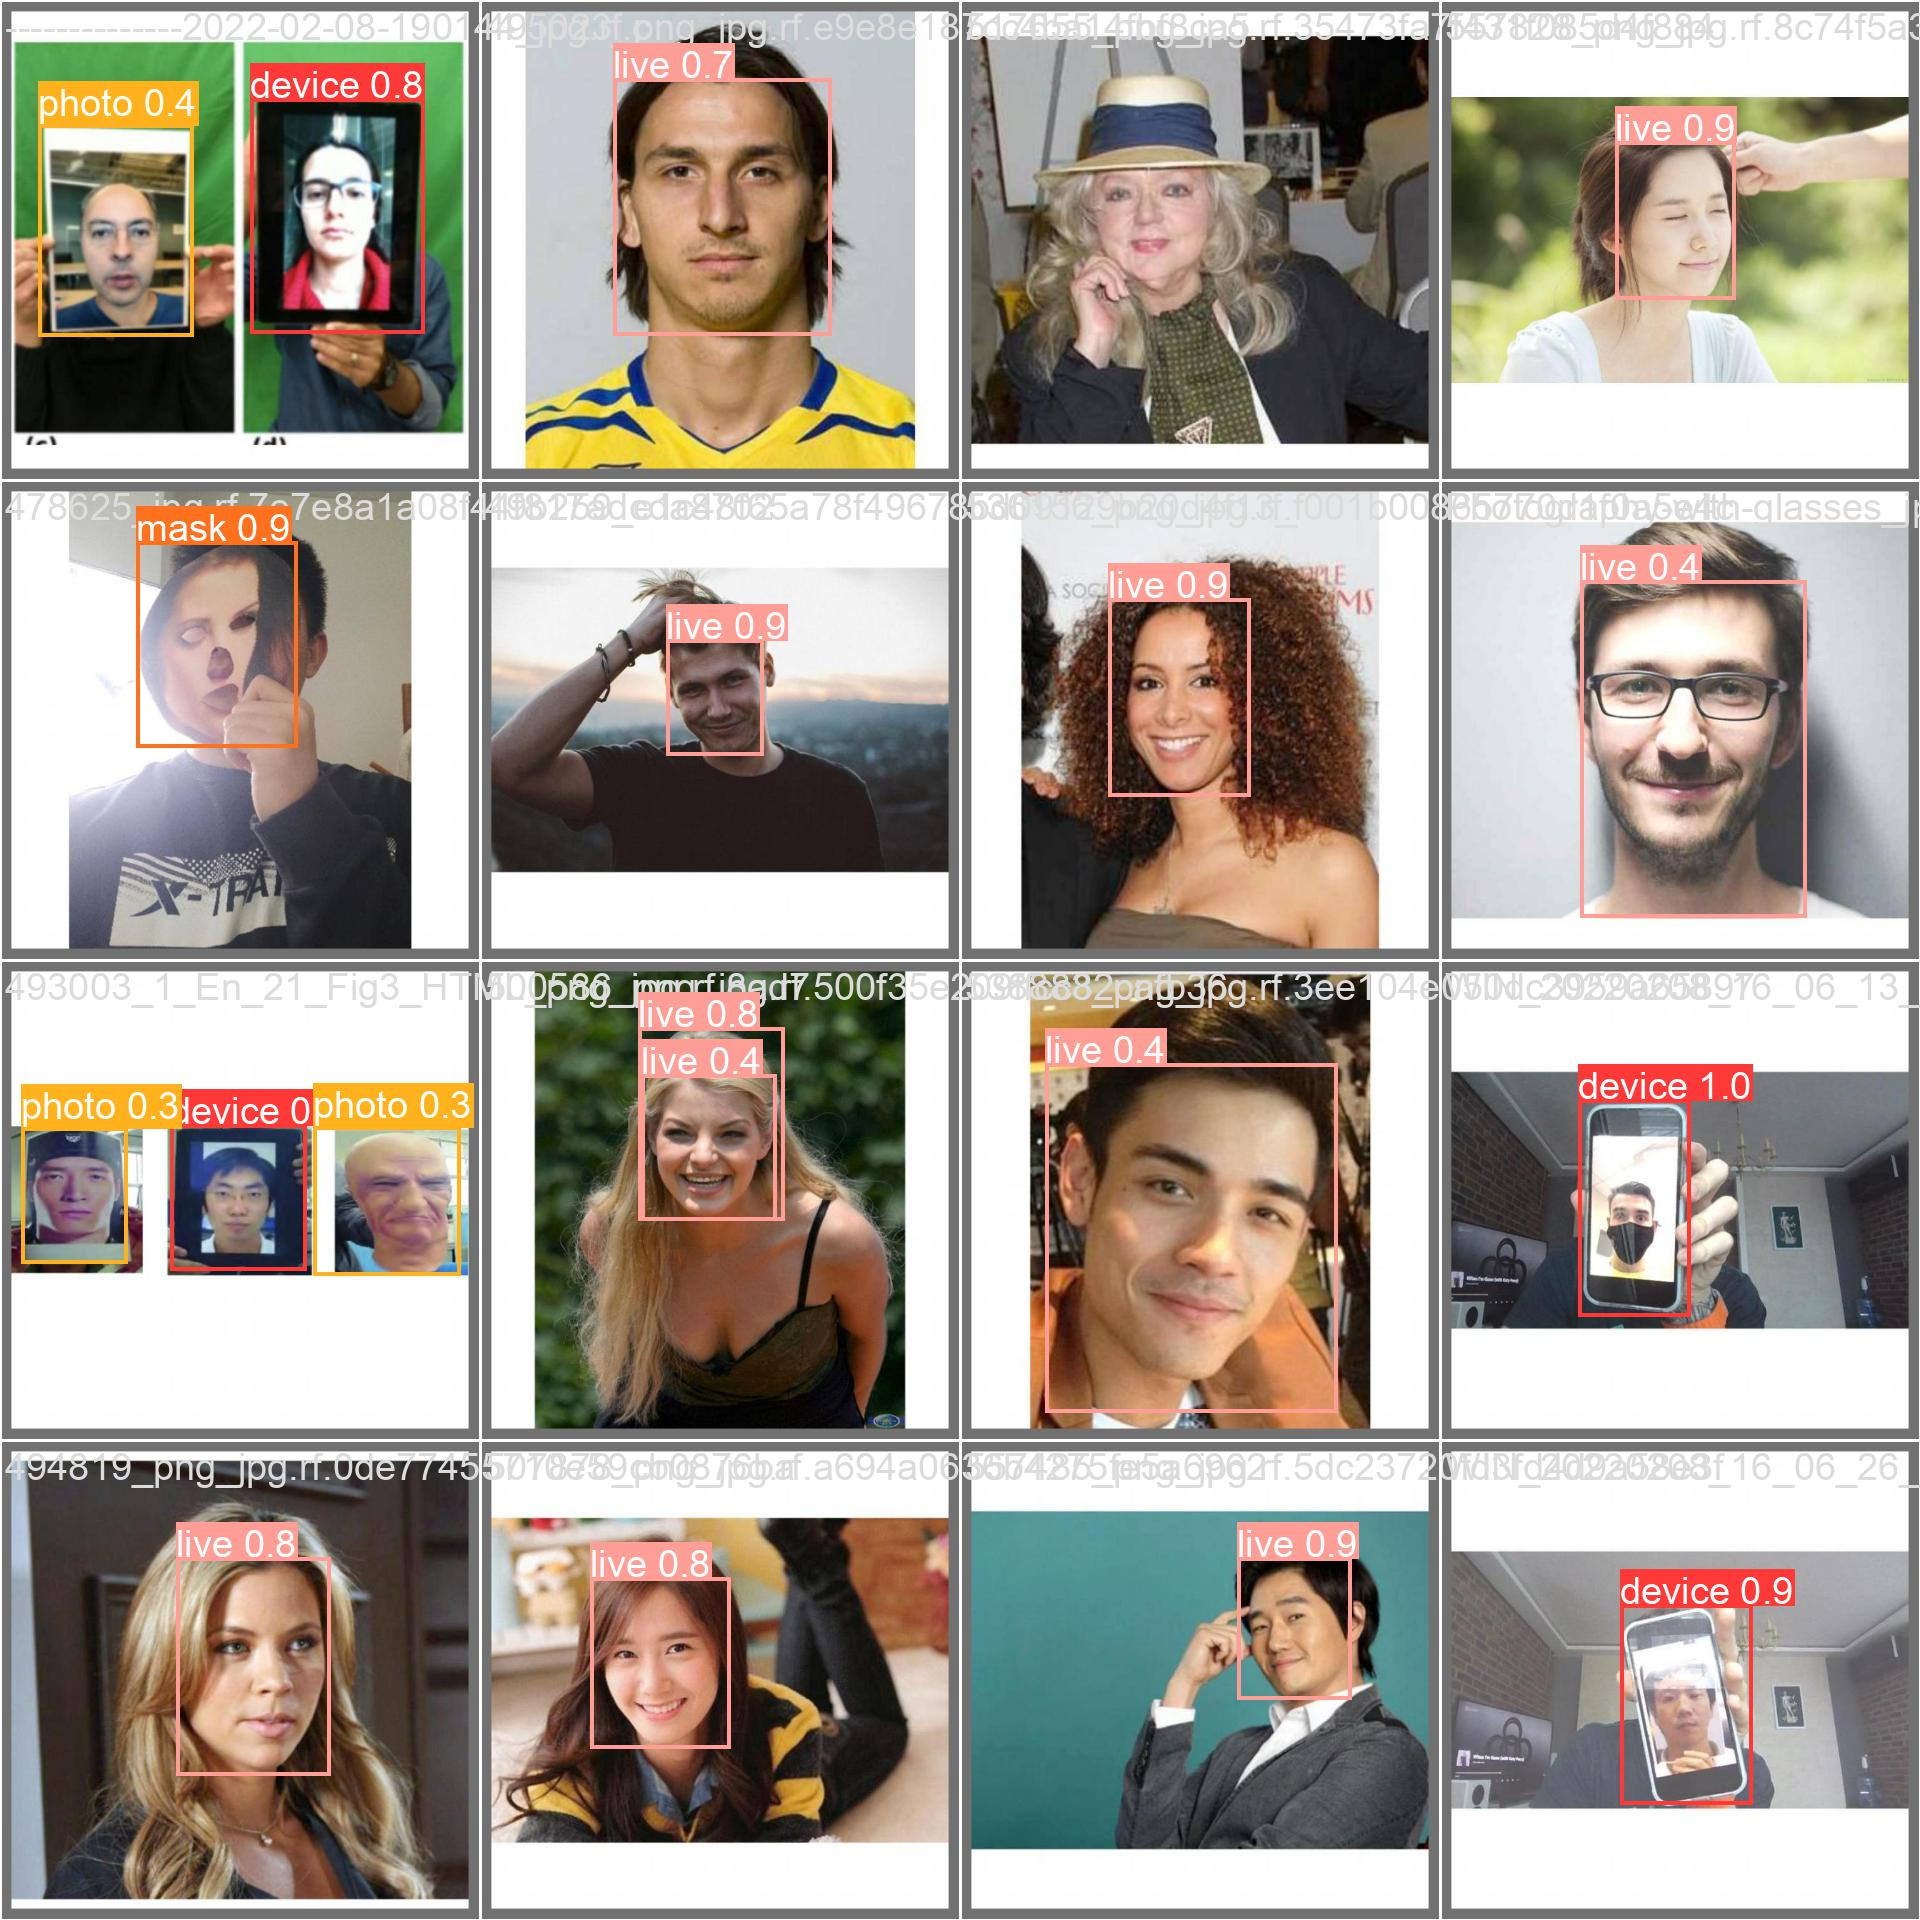

In [10]:
#Chamando a imagem para visualização
HOME = os.getcwd()

%cd {HOME}
from IPython.display import display, Image

Image(filename=f'{HOME}/runs/detect/yolov8n_custom/val_batch0_pred.jpg', width= 700)


In [11]:
from google.colab import files
files.download('./runs/detect/yolov8n_custom/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>